In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [2]:
###############################
# ess_combined_2012_2014.csv
###############################

In [3]:
ess_data = pd.read_csv('data/ess_combined_2012_2014.csv')
ess_data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [4]:
ess_data.dtypes

cntry      object
idno        int64
year        int64
tvtot       int64
ppltrst     int64
pplfair     int64
pplhlp      int64
happy       int64
sclmeet     int64
sclact      int64
gndr        int64
agea        int64
partner     int64
dtype: object

In [5]:
# 1) Did people become less trusting from 2012 to 2014?
#   *** It appears that no, people did not become less trusting from 2012 to 2014

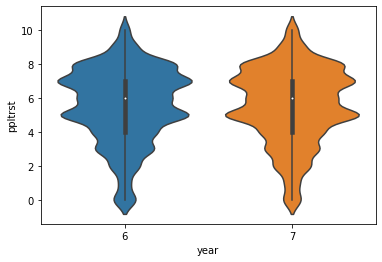

In [6]:
sns.violinplot(x='year', y='ppltrst', data=ess_data)
plt.show()

In [7]:
t2012 = ess_data[ess_data['year'] == 6]
t2014 = ess_data[ess_data['year'] == 7]
stats.ttest_ind(t2012['ppltrst'], t2014['ppltrst'])

Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

In [8]:
# 2) Did people become happier from 2012 to 2014?
#    **** It appears that yes, people did become happier from 2012 to 2014

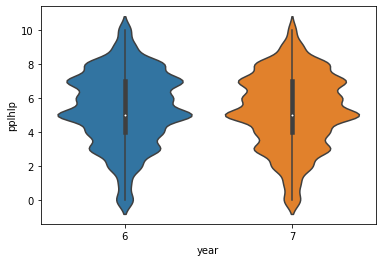

In [9]:
sns.violinplot(x='year', y='pplhlp', data=ess_data)
plt.show()

In [10]:
h2012 = ess_data[ess_data['year'] == 6]
h2014 = ess_data[ess_data['year'] == 7]
stats.ttest_ind(h2012['pplhlp'], h2014['pplhlp'])

Ttest_indResult(statistic=2.9709155019786606, pvalue=0.002977803992604439)

In [11]:
# 3) Pick three or four of the countries in the sample and compare how often people met socially in 2014. 
# Are there differences, and if so, which countries stand out?
#     **** There is definitly a difference between Czech Republic and the other countries.  Sweden and Norway are similar.

In [12]:
ess_data['cntry'].value_counts()

ES    2292
SE    1726
CH    1475
NO    1420
CZ    1207
DE      27
Name: cntry, dtype: int64

In [13]:
czech = ess_data[ess_data['cntry'] == 'CZ']
sweden = ess_data[ess_data['cntry'] == 'SE']
norway = ess_data[ess_data['cntry'] == 'NO']

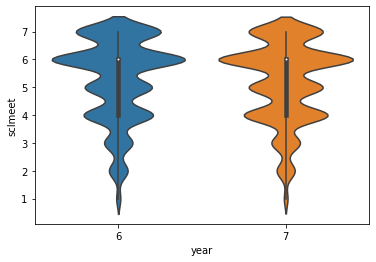

In [14]:
sns.violinplot(x='year', y='sclmeet', data=ess_data)
plt.show()

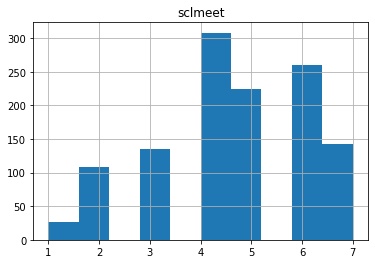

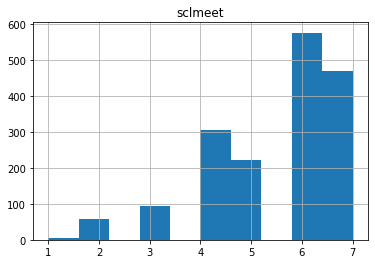

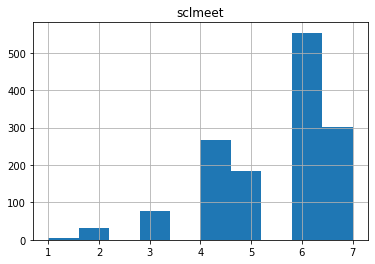

In [15]:
czech.hist('sclmeet')
sweden.hist('sclmeet')
norway.hist('sclmeet')
plt.show()

In [16]:
stats.kruskal(czech['sclmeet'], sweden['sclmeet'])

KruskalResult(statistic=232.36525878334288, pvalue=1.817733885544913e-52)

In [17]:
stats.kruskal(czech['sclmeet'], norway['sclmeet'])

KruskalResult(statistic=192.14822554973475, pvalue=1.0800237699468865e-43)

In [18]:
stats.kruskal(sweden['sclmeet'], norway['sclmeet'])

KruskalResult(statistic=3.144230641341236, pvalue=0.07619592698476517)

In [19]:
# 4) Pick three or four of the countries in the sample and compare how often people took part in social 
# activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?
#    *** There are slight differences.  Norway and Sweden are very similar.  Czech Republic has the same distribution, but
#        they took part in social activities less on average.

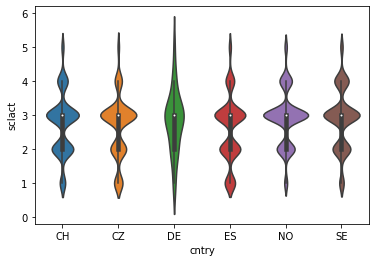

In [20]:
group = ess_data[['cntry', 'year', 'sclact']]
sns.violinplot(x='cntry', y='sclact', data=group)
plt.show()

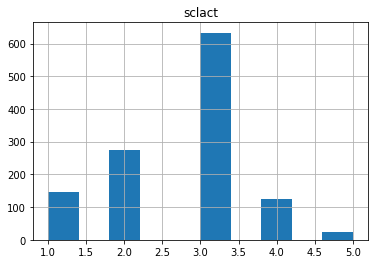

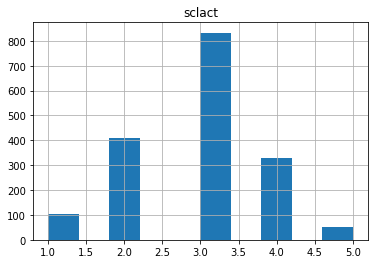

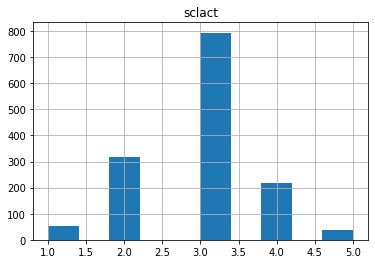

In [21]:
czech.hist('sclact')
sweden.hist('sclact')
norway.hist('sclact')
plt.show()

In [22]:
g1 = ess_data.loc[(ess_data['cntry'] == 'CZ') & (ess_data['year'] == 7)]
g2 = ess_data.loc[(ess_data['cntry'] == 'SE') & (ess_data['year'] == 7)]
g3 = ess_data.loc[(ess_data['cntry'] == 'NO') & (ess_data['year'] == 7)]

f, p = stats.f_oneway(g1['sclact'], g2['sclact'], g3['sclact'])
p

0.0019656989728481906

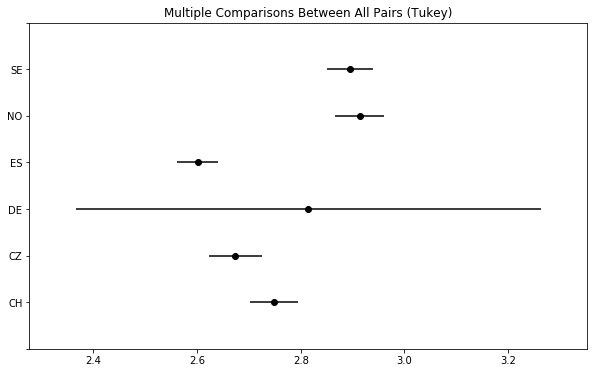

In [23]:
tukey_results = pairwise_tukeyhsd(ess_data['sclact'], ess_data['cntry'])

tukey_results.plot_simultaneous()
plt.show()

In [24]:
###############################
# rfft.csv
###############################

In [25]:
r_data = pd.read_csv('data/rfft.csv')
r_data.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


In [26]:
r_data.dtypes

Casenr             int64
Age                int64
Gender            object
Education         object
Measurement       object
Unique           float64
Perseverative    float64
Interval          object
dtype: object

In [27]:
# 1) Is there a significant difference in the number of unique designs drawn by the same participants 
# from measurement 2 to measurement 3?
#    *** Yes, there a significant difference, # of designs for measurement 2 are around 79, while
#        measurement 3 are around 83

In [28]:
r_data['meas'] = r_data['Measurement'].str.split(" ").str[1]
r_data

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval,meas
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable,1
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556,2
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033,3
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable,1
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362,2
...,...,...,...,...,...,...,...,...,...
7540,2514,47,Male,4,Measurement 2 (2006-2008),83.0,9.0,2.666885713,2
7541,2514,47,Male,4,Measurement 3 (2008-2012),117.0,17.0,2.696783025,3
7542,2515,78,Female,4,Measurement 1 (2003-2006),78.0,8.0,Not applicable,1
7543,2515,78,Female,4,Measurement 2 (2006-2008),80.0,12.0,2.781884891,2


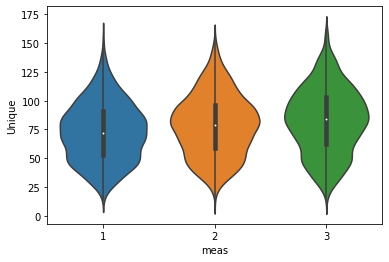

In [29]:
sns.violinplot(x='meas', y='Unique', data=r_data)
plt.show()

In [30]:
g2 = r_data.loc[(r_data['meas'] == '2')]
g3 = r_data.loc[(r_data['meas'] == '3')]

f, p = stats.f_oneway(g2['Unique'], g3['Unique'])
p

2.402174087990285e-07

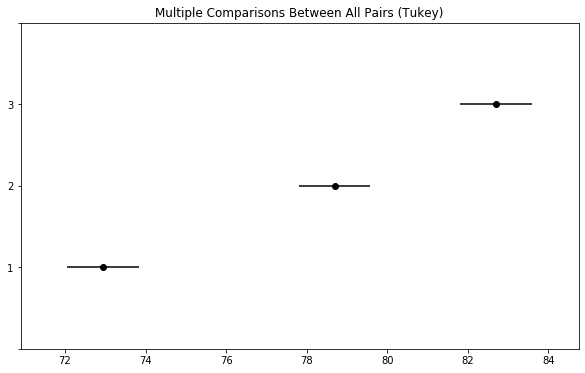

In [31]:
tukey_results = pairwise_tukeyhsd(r_data['Unique'], r_data['meas'])

tukey_results.plot_simultaneous()
plt.show()

In [32]:
# 2) Is there a significant difference in the number of perseverative errors drawn by the same participants 
# from measurement 2 to measurement 3?
#    *** There is a significant difference, the p-value is 1%, which is less than 5%

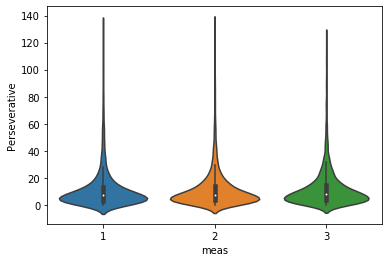

In [33]:
sns.violinplot(x='meas', y='Perseverative', data=r_data)
plt.show()

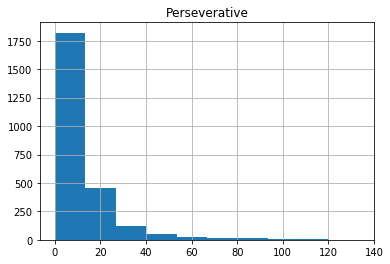

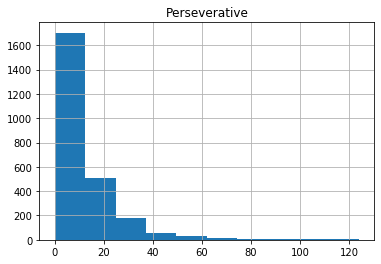

In [34]:
g2.hist('Perseverative')
g3.hist('Perseverative')
plt.show()

In [35]:
stats.mannwhitneyu(g2['Perseverative'], g3['Perseverative'])

MannwhitneyuResult(statistic=3048799.5, pvalue=0.013516183117964028)